# latihan 5 feature detection and matching

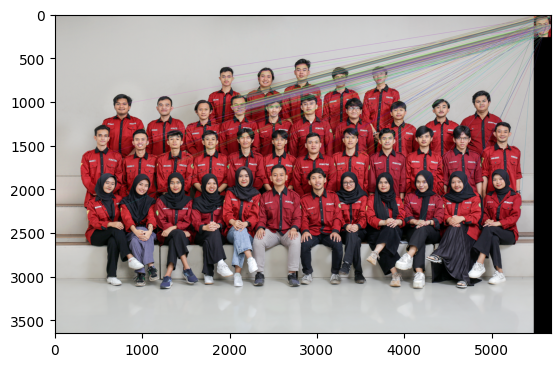

(<matplotlib.image.AxesImage at 0x1cdc27100a0>, None)

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# gunakan gambar yang ada pada laptop masing2
img1 = cv2.imread('BSOconference.jpg')
img2 = cv2.imread('hafis.jpg')
gray1= cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2= cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

# menggunakan detector SIFT
sift = cv2.xfeatures2d.SIFT_create()

# mencari keypoint dengan SIFT
kp1, des1 = sift.detectAndCompute(gray1,None)
kp2, des2 = sift.detectAndCompute(gray2,None)

# melakukan matching dari hasil deteksi keypoints menggunakan BruteForce Matcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# uji rasio matching sederhana
good = []
for m,n in matches:
    if m.distance < 0.5*n.distance:
        good.append([m])
img3 = None

# menggambar hasil match pada gambar baru (IMG3)
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,img3,flags=2)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)),plt.show()